In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [5]:
data = pd.read_csv('airline.csv')

In [ ]:
miles: miles traveled through the flight
passengers: number of passengers on the flight
delay: take-off delay in minutes
inflight_meal: is there a meal included in the flight?
inflight_entertainment: are there free entertainment systems for each seat?
inflight_wifi: is there complimentary wifi on the flight?
day_of_week: day of the week of the flight
weekend: did this flight take place on a weekend
coach_price: the average price paid for a coach ticket
firstclass_price: the average price paid for first-class seats
hours: how many hours the flight took
redeye: was this flight a redeye (overnight)?

In [7]:
data.columns

Index(['miles', 'passengers', 'delay', 'inflight_meal',
       'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye',
       'weekend', 'coach_price', 'firstclass_price', 'hours'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [9]:
data.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


#### Converting every yes or no into a 1 or 0, respectively

In [10]:
data['inflight_meal'] = data['inflight_meal'].apply(lambda x: 1 if x=='Yes' else 0)

In [11]:
data['inflight_entertainment'] = data['inflight_entertainment'].apply(lambda x: 1 if x=='Yes' else 0)
data['inflight_wifi'] = data['inflight_wifi'].apply(lambda x: 1 if x=='Yes' else 0)
data['weekend'] = data['weekend'].apply(lambda x: 1 if x=='Yes' else 0)

In [12]:
data.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,0,1,1,Sunday,Yes,1,338.820,1571.02,1
1,3163,214,0,0,1,1,Sunday,No,1,472.655,1663.70,6
2,1832,212,0,0,1,0,Friday,No,1,351.960,1429.86,3
3,925,213,0,0,1,1,Saturday,No,1,387.835,1558.76,2
4,967,217,0,1,1,1,Monday,No,0,374.735,1245.58,2


In [13]:
data.delay.max()

1560

#### Visualizing Coach ticket prices, high and low values, average price

In [14]:
mean_coachprice = data.coach_price.mean()
median_coachprice = data.coach_price.median()
mean_coachprice, median_coachprice

(376.58525308213905, 380.56)

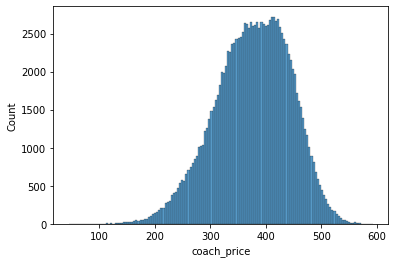

In [15]:
sns.histplot(x=data.coach_price, data=data)
plt.show()

<AxesSubplot:xlabel='coach_price'>

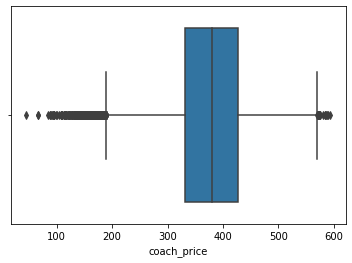

In [16]:
sns.boxplot(x=data.coach_price, data=data)

In [17]:
data.coach_price.min(), data.coach_price.max()

(44.415, 593.635)

In [18]:
data.coach_price.idxmax(), data.coach_price.idxmin()

(57888, 49417)

#### Visualizing Coach prices for 8 hour long flights

In [19]:
data.hours.unique()

array([1, 6, 3, 2, 4, 7, 5, 8])

In [20]:
data.hours.value_counts()

4    37202
3    27200
1    17376
5    16428
2    15957
7    10451
8     2634
6     2532
Name: hours, dtype: int64

In [21]:
data_for8hour_flights = data[data.hours == 8]
len(data_for8hour_flights)

2634

In [22]:
data_for8hour_flights.coach_price.max(), data_for8hour_flights.coach_price.min()

(593.635, 170.77)

<AxesSubplot:xlabel='coach_price', ylabel='Count'>

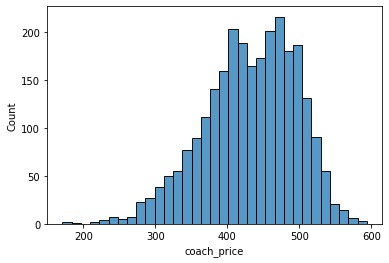

In [23]:
sns.histplot(x= data_for8hour_flights.coach_price, data = data_for8hour_flights)

<AxesSubplot:xlabel='coach_price'>

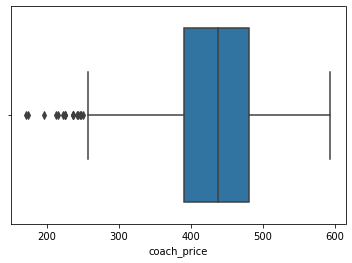

In [24]:
sns.boxplot(data= data_for8hour_flights, x=data_for8hour_flights.coach_price)

In [25]:
data_for8hour_flights.coach_price.median()

437.115

#### Delay distribution

In [26]:
data.delay.mean(), data.delay.median()

(13.162844814301126, 10.0)

In [27]:
data.delay.min(), data.delay.max()

(0, 1560)

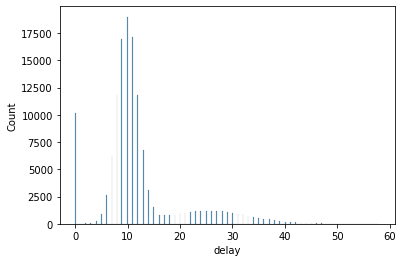

In [28]:
sns.histplot(x=data.delay[data.delay < 500] , data=data)
plt.show()

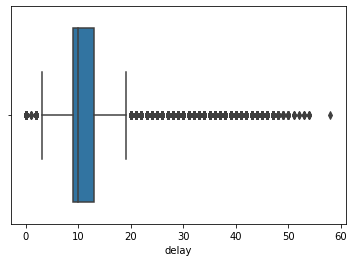

In [29]:
sns.boxplot(x=data.delay[data.delay < 500] , data=data)
plt.show()

as we can see, outliers heavily influence the graphs. But if we graph only where the delays are 500 or less
we can see that most of the data concentrates around 10-20 minutes delay

#### Bivariate Analysis
#### Relationship between coach and first class prices

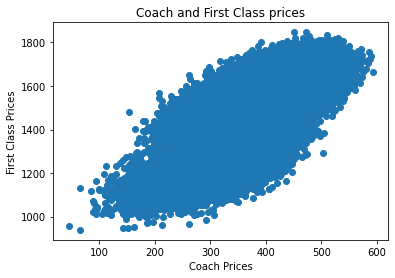

In [30]:
plt.scatter(data.coach_price, data.firstclass_price)
plt.xlabel('Coach Prices')
plt.ylabel('First Class Prices')
plt.title('Coach and First Class prices')
plt.show()

Thera appears to be a lineal positive relationship, a higher coach ticket price suggests a higher first class
fare as well

We can imporve the analysis with a LOWESS graph

In [31]:
perc = 0.1
flight_sub = data.sample(n = int(data.shape[0]*perc))

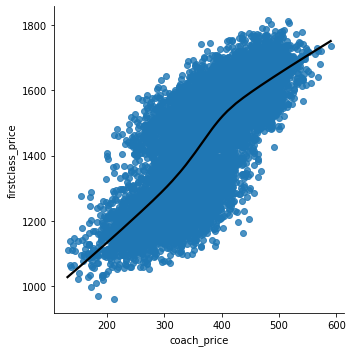

In [32]:
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()

#### Coach prices in relation with inflight features: meal, entertainment and wifi

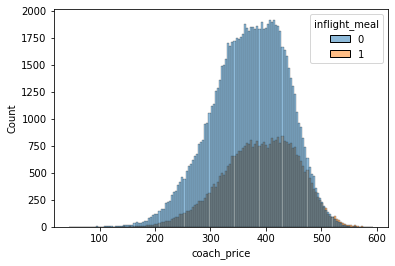

In [33]:
sns.histplot(data=data, x = "coach_price", hue = data.inflight_meal)
plt.show()

<AxesSubplot:xlabel='inflight_meal', ylabel='coach_price'>

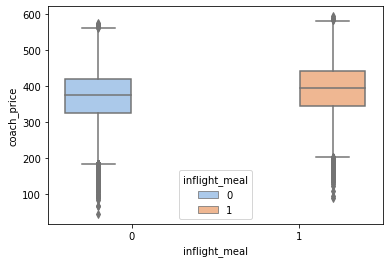

In [34]:
sns.boxplot(data= data, x='inflight_meal', y='coach_price', palette='pastel', hue='inflight_meal')

In [35]:
data.coach_price[data.inflight_meal == 1].mean()

390.09980701619315

In [36]:
data.coach_price[data.inflight_meal == 0].mean()

370.7862857190049

as we can observe, the meal appears to have no significant bearing over the price

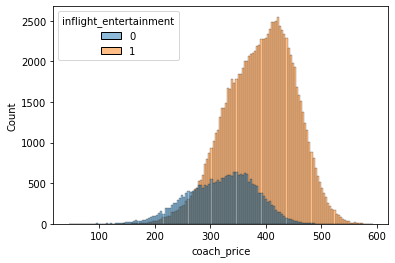

In [37]:
sns.histplot(data=data, x = "coach_price", hue = data.inflight_entertainment)
plt.show()

In [38]:
data.inflight_entertainment.value_counts()

1    104028
0     25752
Name: inflight_entertainment, dtype: int64

In [39]:
data.coach_price[data.inflight_entertainment == 1].mean()

390.48814924827946

In [40]:
data.coach_price[data.inflight_entertainment == 0].mean()

320.4229945246971

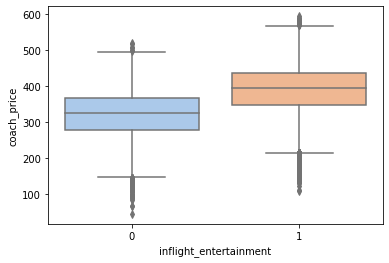

In [41]:
sns.boxplot(data= data, x='inflight_entertainment', y='coach_price', palette='pastel')
plt.show()

In [42]:
data.coach_price[data.inflight_wifi == 1].mean(), data.coach_price[data.inflight_wifi == 0].mean()

(383.65137462960104, 313.1856258644537)

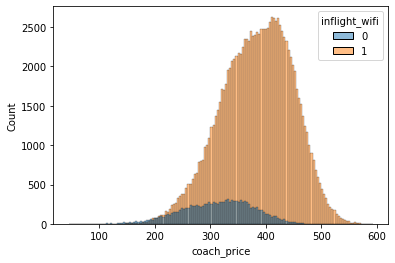

In [43]:
sns.histplot(data=data, x = "coach_price", hue = data.inflight_wifi)
plt.show()

In [44]:
data.inflight_wifi.value_counts()

1    116766
0     13014
Name: inflight_wifi, dtype: int64

<AxesSubplot:xlabel='inflight_wifi', ylabel='coach_price'>

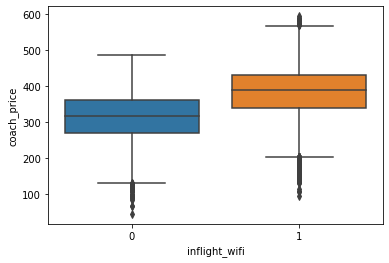

In [45]:
sns.boxplot(data=data, x='inflight_wifi', y='coach_price')

In flight wifi appears to have a positive relation with the price. When there is inflight wifi, prices tend to be higher

#### Number of passengers in relation to flight lengths

In [46]:
data.hours[data.passengers].value_counts()

3    29553
1    29230
4    28223
5    20906
2    13643
7     7782
6      443
Name: hours, dtype: int64

In [47]:
data.hours.unique()

array([1, 6, 3, 2, 4, 7, 5, 8])

In [48]:
data.groupby('hours').passengers.mean()

hours
1    207.839894
2    207.811556
3    207.679265
4    207.677087
5    207.775262
6    207.379937
7    207.787580
8    207.270691
Name: passengers, dtype: float64

<AxesSubplot:xlabel='hours', ylabel='passengers'>

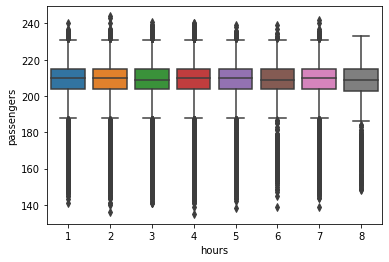

In [49]:
sns.boxplot(data=data, x='hours', y='passengers')

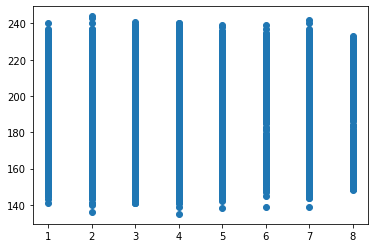

In [50]:
plt.scatter(x=data.hours, y=data.passengers)

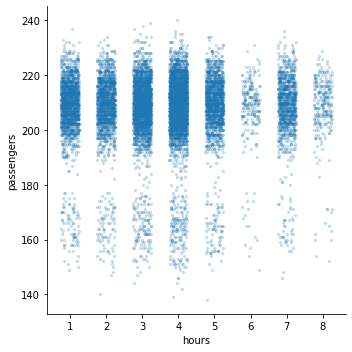

In [51]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)